# RMSE and ACC plots

* This notebook creates the RMSE and ACC verification figure for the CREDIT paper

* The notebook runs with `plot_config.yml` in the same folder

In [1]:
import os
import sys
import yaml
import numpy as np
from datetime import datetime, timedelta

# graph tools
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.patches as patches

import matplotlib.ticker as mticker
import matplotlib.gridspec as gridspec
from matplotlib.lines import Line2D
%matplotlib inline

sys.path.insert(0, os.path.realpath('../libs/'))
import graph_utils as gu

### Load config

In [2]:
config_name = os.path.realpath('plot_config.yml')

with open(config_name, 'r') as stream:
    conf = yaml.safe_load(stream)

### Figure settings

In [3]:
need_publish = False

# True: publication quality figures
# False: low resolution figures in the notebook

if need_publish:
    dpi_ = conf['figure']['keys']['dpi']
else:
    dpi_ = 75

### Load RMSE and ACC data

In [4]:
PLOT_data = np.load(conf['data']['save_loc'] + 'scores_CREDIT_arXiv_2024_fuxi_wxformer.npy', allow_pickle=True)[()]

In [5]:
PLOT_data_1h = np.load(conf['data']['save_loc'] + 'scores_CREDIT_arXiv_2024_wxformer_1h.npy', allow_pickle=True)[()]

## Plot (6 hourly and hourly)

**Figure specs**

In [6]:
def no_decimals(x, pos):
    return f'{int(x)}'

# color specs
my_colors = gu.ksha_color_set_summon(color_set=0)
colors_main = [my_colors['blue'], my_colors['orange'], my_colors['red'], [0.4, 0, 0]]

# line specs
line_keys = {}
line_keys['IFS_rmse'] = {'linewidth': 3, 'linestyle': '-', 'color': colors_main[0], 
                         'alpha': 1, 'zorder': 2, 'label': ''}
line_keys['wxformer_rmse'] = {'linewidth': 3, 'linestyle': '-', 'color': colors_main[2], 
                              'alpha': 1, 'zorder': 3, 'label': ''}
line_keys['wxformer_rmse_1h'] = {'linewidth': 3, 'linestyle': '-', 'color': colors_main[3], 
                                 'alpha': 1, 'zorder': 3, 'label': ''}
line_keys['fuxi_rmse'] = {'linewidth': 3, 'linestyle': '-', 'color': colors_main[1], 
                          'alpha': 1, 'zorder': 3, 'label': ''}

line_keys['IFS_acc'] = {'linewidth': 3, 'linestyle': '--', 'color': colors_main[0], 
                        'alpha': 1, 'zorder': 2, 'label': ''}
line_keys['wxformer_acc'] = {'linewidth': 3, 'linestyle': '--', 'color': colors_main[2], 
                             'alpha': 1, 'zorder': 3, 'label': ''}
line_keys['wxformer_acc_1h'] = {'linewidth': 3, 'linestyle': '--', 'color': colors_main[3], 
                             'alpha': 1, 'zorder': 3, 'label': ''}
line_keys['fuxi_acc'] = {'linewidth': 3, 'linestyle': '--', 'color': colors_main[1], 
                         'alpha': 1, 'zorder': 3, 'label': ''}

# labeling specs
LEADs = np.arange(6, 240+6, 6)
LEAD_ticks = np.arange(0, 240+6, 6)[::8]

model_names = ['IFS', 'fuxi', 'wxformer']
varnames_plot = ['U500', 'V500', 'T500', 'Q500', 'Z500', 't2m']
var_scales = [1.0, 1.0, 1.0, 1e4, 1e-2, 1]
var_scale_strs = ['1', '1', '1', '1E-4', '1E2', '1']

titles = ['(a) 500 hPa zonal wind', 
          '(b) 500 hPa meridional wind', 
          '(c) 500 hPa air temperature', 
          '(d) 500 hPa specific humidity', 
          '(e) 500 hPa geopotential height', 
          '(f) 2-m temperature']

legned_labels_rmse = ['RMSE - 6 hourly IFS', 'RMSE - 6 hourly FuXi', 
                      'RMSE - 6 hourly WXFormer', 'RMSE - hourly WXFormer']
legned_labels_acc = ['ACC - 6 hourly IFS', 'ACC - 6 hourly FuXi', 
                     'ACC - 6 hourly WXFormer', 'ACC - hourly WXFormer']

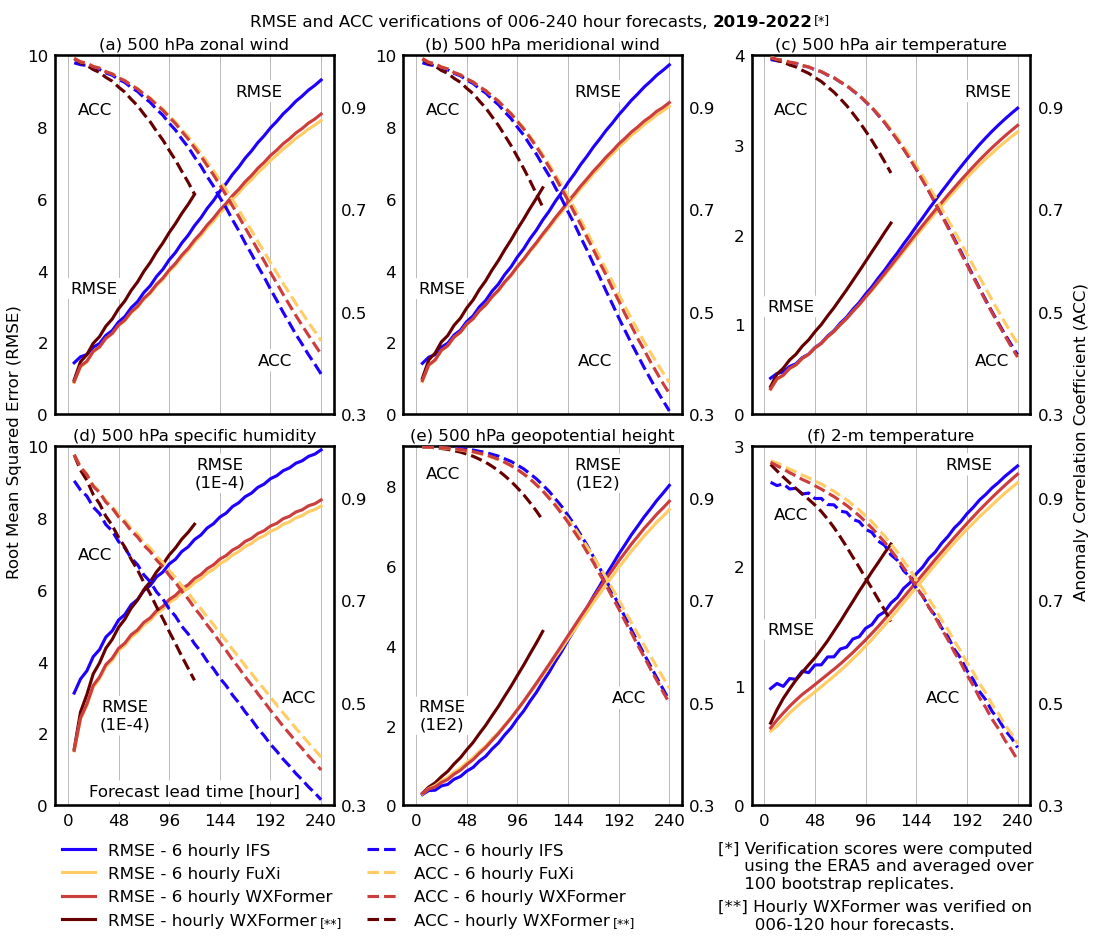

In [7]:
handles = []
h_ratios = [1, 0.09, 1]
w_ratios = [1, 0.25, 1, 0.25, 1]

pos_RMSE1 = [[[0.14, 0.35], [0.14, 0.35], [0.14, 0.3]], 
             [[0.25, 0.25], [0.14, 0.25], [0.14, 0.49]]]

pos_RMSE2 = [[[0.73, 0.9], [0.70, 0.9], [0.85, 0.9]], 
             [[0.59, 0.925], [0.7, 0.925], [0.78, 0.95]]]


pos_ACC1 = [[[0.85, 0.15], [0.75, 0.15], [0.925, 0.15]], 
            [[0.9375, 0.3], [0.87, 0.3], [0.75, 0.3]]]

pos_ACC2 = [[[0.205, 0.85], [0.205, 0.85], [0.205, 0.85]], 
            [[0.205, 0.7], [0.205, 0.925], [0.205, 0.81]]]

fig = plt.figure(figsize=(13, 10), dpi=dpi_)
gs = gridspec.GridSpec(len(h_ratios), len(w_ratios),
                       height_ratios=h_ratios, width_ratios=w_ratios)

ind_x = [0, 2]
ind_y = [0, 2, 4]

AX = np.zeros((2 * len(ind_x), len(ind_y)), dtype=object)
AX_flat = []

# Create main axes
for ix, ix_gs in enumerate(ind_x):
    for iy, iy_gs in enumerate(ind_y):
        ax_main = plt.subplot(gs[ix_gs, iy_gs])
        AX[ix][iy] = ax_main
        AX_flat.append(ax_main)

# Create twin axes for the right y-axis
for ix, ix_gs in enumerate(ind_x):
    for iy, iy_gs in enumerate(ind_y):
        ax_twin = AX[ix][iy].twinx()
        AX[len(ind_x) + ix][iy] = ax_twin

plt.subplots_adjust(0, 0, 1, 1, hspace=0.0, wspace=0.0)

# Configure all axes in AX_flat
for ax in AX_flat:
    ax = gu.ax_decorate_box(ax)
    ax.tick_params(labelleft=True, labelsize=16)
    ax.set_xticks(LEAD_ticks)
    ax.set_xlim([LEAD_ticks[0]-12, LEAD_ticks[-1]+12])
    ax.xaxis.grid(False)
    ax.grid(':', axis='x')

# Set x-tick labels for the bottom row
for iy in range(len(ind_y)):
    AX[1][iy].tick_params(labelbottom=True,labelsize=16)
    AX[1][iy].set_xticklabels(LEAD_ticks)

# Configure left y-axis formatting
for ix in range(len(ind_x)):
    for iy in range(len(ind_y)):
        ax = AX[ix][iy]
        ax.yaxis.set_label_position('left')
        ax.tick_params(axis='y', labelsize=16, left=False, labelleft=True)
        if ix==1 and iy==2:
            ax.set_yticks([0, 1, 2, 3])
        else:
            ax.locator_params(axis='y', nbins=6)
        ax.yaxis.set_major_formatter(mticker.FuncFormatter(no_decimals))

AX[0][0].set_ylabel('Root Mean Squared Error (RMSE)', y=-0.075, fontsize=16)
AX[2][2].set_ylabel('Anomaly Correlation Coefficient (ACC)', labelpad=10, y=-0.075, fontsize=16)

# Configure right y-axis formatting
for ix in range(len(ind_x)):
    for iy in range(len(ind_y)):
        ax_twin = AX[len(ind_x) + ix][iy]
        ax_twin.yaxis.set_label_position('right')
        ax_twin.tick_params(axis='y', labelsize=16, right=False, labelright=True)
        ax_twin.set_ylim([0.3, 1.0])
        ax_twin.set_yticks([0.3, 0.5, 0.7, 0.9])

for iy, var in enumerate(varnames_plot):
    
    f = var_scales[iy] # get the scale to plot
    # # set ylim here to match the max RMSE vals
    ylim_min = np.min([np.min(f*PLOT_data['RMSE_{}_{}_mean'.format('fuxi', var)]),
                       np.min(f*PLOT_data['RMSE_{}_{}_mean'.format('wxformer', var)]),
                       np.min(f*PLOT_data['RMSE_{}_{}_mean'.format('IFS', var)])])

    ylim_max = np.max([np.max(f*PLOT_data['RMSE_{}_{}_mean'.format('fuxi', var)]),
                       np.max(f*PLOT_data['RMSE_{}_{}_mean'.format('wxformer', var)]),
                       np.max(f*PLOT_data['RMSE_{}_{}_mean'.format('IFS', var)])])
    
    for i_model, model_name in enumerate(model_names):

        # ====================================== #
        # panel indexing
        iy_ax = iy
        ix_ax = 0 # select top 3 or bottom 3
        if iy > 2:
            iy_ax = iy_ax - 3
            ix_ax = 1
            
        # --------------------------------------------------------------------------- #
        # RMSE
        AX[0+ix_ax][iy_ax].plot(LEADs, 
                                f*PLOT_data['RMSE_{}_{}_mean'.format(model_name, var)], 
                                **line_keys['{}_rmse'.format(model_name)])
        if i_model == 0:
            AX[0+ix_ax][iy_ax].plot(LEADs[:20], 
                                    f*PLOT_data_1h['RMSE_{}_{}_mean'.format('wxformer', var)], 
                                    **line_keys['wxformer_rmse_1h'])
        
        if f == 1:
            AX[0+ix_ax][iy_ax].text(pos_RMSE1[ix_ax][iy_ax][0], pos_RMSE1[ix_ax][iy_ax][1], 
                                    'RMSE', ha='center', va='center', fontsize=16, 
                                    bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.2'),
                                    transform=AX[0+ix_ax][iy_ax].transAxes)
            AX[0+ix_ax][iy_ax].text(pos_RMSE2[ix_ax][iy_ax][0], pos_RMSE2[ix_ax][iy_ax][1], 
                                    'RMSE', ha='center', va='center', fontsize=16, 
                                    bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.2'),
                                    transform=AX[0+ix_ax][iy_ax].transAxes)
        else:
            AX[0+ix_ax][iy_ax].text(pos_RMSE1[ix_ax][iy_ax][0], pos_RMSE1[ix_ax][iy_ax][1], 
                                    'RMSE\n({})'.format(var_scale_strs[iy]), ha='center', va='center', 
                                    bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.2'),
                                    fontsize=16, transform=AX[ix_ax][iy_ax].transAxes)
            AX[0+ix_ax][iy_ax].text(pos_RMSE2[ix_ax][iy_ax][0], pos_RMSE2[ix_ax][iy_ax][1], 
                                    'RMSE\n({})'.format(var_scale_strs[iy]), ha='center', va='center', 
                                    bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.2'),
                                    fontsize=16, transform=AX[ix_ax][iy_ax].transAxes)
            
        AX[0+ix_ax][iy_ax].set_ylim([0, np.ceil(ylim_max)])
        
        # --------------------------------------------------------------------------- #
        # ACC
        AX[len(ind_x) + ix_ax][iy_ax].plot(LEADs, PLOT_data['ACC_{}_{}_mean'.format(model_name, var)], 
                                           **line_keys['{}_acc'.format(model_name)])
        if i_model == 0:
            AX[len(ind_x) + ix_ax][iy_ax].plot(LEADs[:20], PLOT_data_1h['ACC_{}_{}_mean'.format('wxformer', var)], 
                                               **line_keys['wxformer_acc_1h'])
        
        AX[len(ind_x) + ix_ax][iy_ax].text(pos_ACC1[ix_ax][iy_ax][0], pos_ACC1[ix_ax][iy_ax][1], 
                                           'ACC', ha='right', va='center', fontsize=16, 
                                           bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.2'),
                                           transform=AX[len(ind_x) + ix_ax][iy_ax].transAxes)
        
        AX[len(ind_x) + ix_ax][iy_ax].text(pos_ACC2[ix_ax][iy_ax][0], pos_ACC2[ix_ax][iy_ax][1], 
                                           'ACC', ha='right', va='center', fontsize=16, 
                                           bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.2'),
                                           transform=AX[len(ind_x) + ix_ax][iy_ax].transAxes)
        # title
        AX[ix_ax][iy_ax].set_title(titles[iy], fontsize=16)


AX[1][0].text(0.5, 0.06, 'Forecast lead time [hour]', ha='center', va='top', 
              fontsize=16, transform=AX[1][0].transAxes,
              bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.2'))

handle_legneds1 = []
handle_legneds1.append(mlines.Line2D([], [], **line_keys['IFS_rmse']))
handle_legneds1.append(mlines.Line2D([], [], **line_keys['fuxi_rmse']))
handle_legneds1.append(mlines.Line2D([], [], **line_keys['wxformer_rmse']))
handle_legneds1.append(mlines.Line2D([], [], **line_keys['wxformer_rmse_1h']))

handle_legneds2 = []
handle_legneds2.append(mlines.Line2D([], [], **line_keys['IFS_acc']))
handle_legneds2.append(mlines.Line2D([], [], **line_keys['fuxi_acc']))
handle_legneds2.append(mlines.Line2D([], [], **line_keys['wxformer_acc']))
handle_legneds2.append(mlines.Line2D([], [], **line_keys['wxformer_acc_1h']))

ax_lg1 = fig.add_axes([0.0, -0.15, 0.3, 0.12])
LG1 = ax_lg1.legend(handle_legneds1, legned_labels_rmse, 
                    bbox_to_anchor=(1, 1), ncol=1, prop={'size':16})

ax_lg2 = fig.add_axes([0.3, -0.15, 0.3, 0.12])
LG2 = ax_lg2.legend(handle_legneds2, legned_labels_acc, 
                    bbox_to_anchor=(1, 1), ncol=1, prop={'size':16})


ax_title1 = fig.add_axes([0.0, 1.015, 1.0, 0.05])
title_len = 0.6
fontsize_list = [16,]*10
fontweight_list = ['normal', 'bold', 'normal', 'bold', 'normal', 'bold', 'normal']
handles += gu.string_partial_format(fig, ax_title1, 0.5*(1-title_len), 0.8, 'left', 'top', 
                                    ['RMSE and ACC verifications of 006-240 hour forecasts, ',
                                     '2019-2022',], 
                                    ['k', 'k'], 
                                    fontsize_list, fontweight_list)

ax_title1.text(0.795, 0.82, '[*]', ha='right', va='top', fontsize=12, transform=ax_title1.transAxes);

ax_words1 = fig.add_axes([0.68, -0.1175, 0.32, 0.07])
ax_words1.text(0, 1, 
     '[*] Verification scores were computed\n'
     '     using the ERA5 and averaged over\n'
     '     100 bootstrap replicates.', 
    ha='left', va='top', fontsize=16, transform=ax_words1.transAxes);

ax_words2 = fig.add_axes([0.68, -0.1625, 0.32, 0.037])
ax_words2.text(0, 1, 
     '[**] Hourly WXFormer was verified on\n'
     '       006-120 hour forecasts.', 
    ha='left', va='top', fontsize=16, transform=ax_words2.transAxes);


ax_words3 = fig.add_axes([0.573, -0.1665, 0.02, 0.02])
ax_words3.text(0.5, 0.5, '[**]', ha='center', va='center', fontsize=12, transform=ax_words3.transAxes);

ax_words4 = fig.add_axes([0.273, -0.1665, 0.02, 0.02])
ax_words4.text(0.5, 0.5, '[**]', ha='center', va='center', fontsize=12, transform=ax_words4.transAxes);

LG1 = gu.lg_box(LG1)
LG2 = gu.lg_box(LG2)
ax_lg1.set_axis_off()
ax_lg2.set_axis_off()
ax_title1.set_axis_off()
ax_words1.set_axis_off()
ax_words2.set_axis_off()
ax_words3.set_axis_off()
ax_words4.set_axis_off()

### Plot (6 hourly only)

**Figure specs**

In [8]:
def no_decimals(x, pos):
    return f'{int(x)}'

# color specs
my_colors = gu.ksha_color_set_summon(color_set=0)
colors_main = [my_colors['blue'], my_colors['orange'], my_colors['red']]

# line specs
line_keys = {}
line_keys['IFS_rmse'] = {'linewidth': 3, 'linestyle': '-', 'color': colors_main[0], 
                         'alpha': 1, 'zorder': 2, 'label': ''}
line_keys['wxformer_rmse'] = {'linewidth': 3, 'linestyle': '-', 'color': colors_main[2], 
                              'alpha': 1, 'zorder': 3, 'label': ''}
line_keys['fuxi_rmse'] = {'linewidth': 3, 'linestyle': '-', 'color': colors_main[1], 
                          'alpha': 1, 'zorder': 3, 'label': ''}

line_keys['IFS_acc'] = {'linewidth': 3, 'linestyle': '--', 'color': colors_main[0], 
                        'alpha': 1, 'zorder': 2, 'label': ''}
line_keys['wxformer_acc'] = {'linewidth': 3, 'linestyle': '--', 'color': colors_main[2], 
                             'alpha': 1, 'zorder': 3, 'label': ''}
line_keys['fuxi_acc'] = {'linewidth': 3, 'linestyle': '--', 'color': colors_main[1], 
                         'alpha': 1, 'zorder': 3, 'label': ''}

# labeling specs
LEADs = np.arange(6, 240+6, 6)
LEAD_ticks = np.arange(0, 240+6, 6)[::8]

model_names = ['IFS', 'fuxi', 'wxformer']
varnames_plot = ['U500', 'V500', 'T500', 'Q500', 'Z500', 't2m']
var_scales = [1.0, 1.0, 1.0, 1e4, 1e-2, 1]
var_scale_strs = ['1', '1', '1', '1E-4', '1E2', '1']

titles = ['(a) 500 hPa u-wind', 
          '(b) 500 hPa v-wind', 
          '(c) 500 hPa air temperature', 
          '(d) 500 hPa specific humidity', 
          '(e) 500 hPa geopotential height', 
          '(f) 2-m temperature']

legned_labels_rmse = ['RMSE - 6 hourly IFS', 'RMSE - 6 hourly FuXi', 'RMSE - 6 hourly WXFormer', ]
legned_labels_acc = ['ACC - 6 hourly IFS', 'ACC - 6 hourly FuXi', 'ACC - 6 hourly WXFormer', ]

**Create the figure**

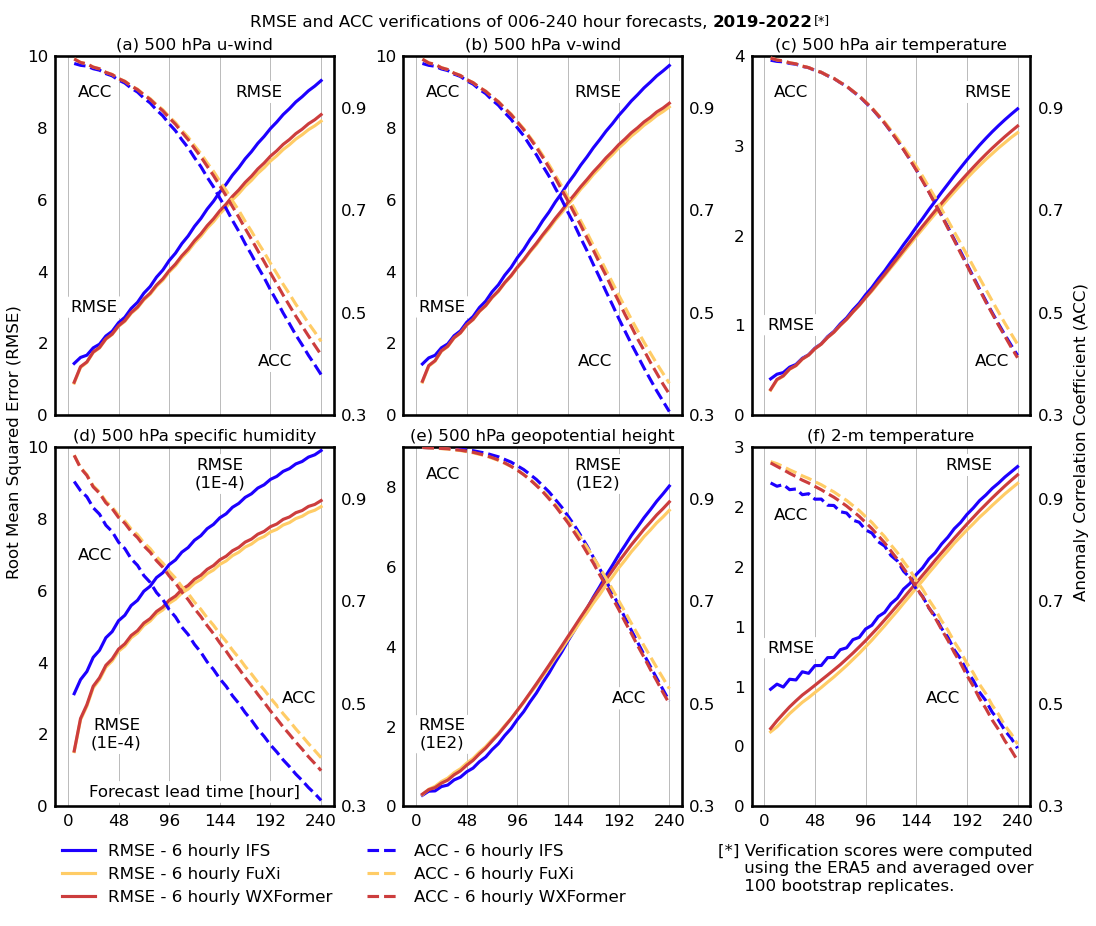

In [9]:
handles = []
h_ratios = [1, 0.09, 1]
w_ratios = [1, 0.25, 1, 0.25, 1]

pos_RMSE1 = [[[0.14, 0.3], [0.14, 0.3], [0.14, 0.25]], 
             [[0.22, 0.2], [0.14, 0.2], [0.14, 0.44]]]

pos_RMSE2 = [[[0.73, 0.9], [0.70, 0.9], [0.85, 0.9]], 
             [[0.59, 0.925], [0.7, 0.925], [0.78, 0.95]]]


pos_ACC1 = [[[0.85, 0.15], [0.75, 0.15], [0.925, 0.15]], 
            [[0.9375, 0.3], [0.87, 0.3], [0.75, 0.3]]]

pos_ACC2 = [[[0.205, 0.9], [0.205, 0.9], [0.205, 0.9]], 
            [[0.205, 0.7], [0.205, 0.925], [0.205, 0.81]]]

fig = plt.figure(figsize=(13, 10), dpi=dpi_)
gs = gridspec.GridSpec(len(h_ratios), len(w_ratios),
                       height_ratios=h_ratios, width_ratios=w_ratios)

ind_x = [0, 2]
ind_y = [0, 2, 4]

AX = np.zeros((2 * len(ind_x), len(ind_y)), dtype=object)
AX_flat = []

# Create main axes
for ix, ix_gs in enumerate(ind_x):
    for iy, iy_gs in enumerate(ind_y):
        ax_main = plt.subplot(gs[ix_gs, iy_gs])
        AX[ix][iy] = ax_main
        AX_flat.append(ax_main)

# Create twin axes for the right y-axis
for ix, ix_gs in enumerate(ind_x):
    for iy, iy_gs in enumerate(ind_y):
        ax_twin = AX[ix][iy].twinx()
        AX[len(ind_x) + ix][iy] = ax_twin

plt.subplots_adjust(0, 0, 1, 1, hspace=0.0, wspace=0.0)

# Configure all axes in AX_flat
for ax in AX_flat:
    ax = gu.ax_decorate_box(ax)
    ax.tick_params(labelleft=True, labelsize=16)
    ax.set_xticks(LEAD_ticks)
    ax.set_xlim([LEAD_ticks[0]-12, LEAD_ticks[-1]+12])
    ax.xaxis.grid(False)
    ax.grid(':', axis='x')

# Set x-tick labels for the bottom row
for iy in range(len(ind_y)):
    AX[1][iy].tick_params(labelbottom=True,labelsize=16)
    AX[1][iy].set_xticklabels(LEAD_ticks)

# Configure left y-axis formatting
for ix in range(len(ind_x)):
    for iy in range(len(ind_y)):
        ax = AX[ix][iy]
        ax.yaxis.set_label_position('left')
        ax.tick_params(axis='y', labelsize=16, left=False, labelleft=True)
        ax.locator_params(axis='y', nbins=6)
        ax.yaxis.set_major_formatter(mticker.FuncFormatter(no_decimals))

AX[0][0].set_ylabel('Root Mean Squared Error (RMSE)', y=-0.075, fontsize=16)
AX[2][2].set_ylabel('Anomaly Correlation Coefficient (ACC)', labelpad=10, y=-0.075, fontsize=16)

# Configure right y-axis formatting
for ix in range(len(ind_x)):
    for iy in range(len(ind_y)):
        ax_twin = AX[len(ind_x) + ix][iy]
        ax_twin.yaxis.set_label_position('right')
        ax_twin.tick_params(axis='y', labelsize=16, right=False, labelright=True)
        ax_twin.set_ylim([0.3, 1.0])
        ax_twin.set_yticks([0.3, 0.5, 0.7, 0.9])

for iy, var in enumerate(varnames_plot):
    
    f = var_scales[iy] # get the scale to plot
    # # set ylim here to match the max RMSE vals
    ylim_min = np.min([np.min(f*PLOT_data['RMSE_{}_{}_mean'.format('fuxi', var)]),
                       np.min(f*PLOT_data['RMSE_{}_{}_mean'.format('wxformer', var)]),
                       np.min(f*PLOT_data['RMSE_{}_{}_mean'.format('IFS', var)])])

    ylim_max = np.max([np.max(f*PLOT_data['RMSE_{}_{}_mean'.format('fuxi', var)]),
                       np.max(f*PLOT_data['RMSE_{}_{}_mean'.format('wxformer', var)]),
                       np.max(f*PLOT_data['RMSE_{}_{}_mean'.format('IFS', var)])])
    
    for i_model, model_name in enumerate(model_names):

        # ====================================== #
        # panel indexing
        iy_ax = iy
        ix_ax = 0 # select top 3 or bottom 3
        if iy > 2:
            iy_ax = iy_ax - 3
            ix_ax = 1
            
        # --------------------------------------------------------------------------- #
        # RMSE
        AX[0+ix_ax][iy_ax].plot(LEADs, 
                                f*PLOT_data['RMSE_{}_{}_mean'.format(model_name, var)], 
                                **line_keys['{}_rmse'.format(model_name)])
        if f == 1:
            AX[0+ix_ax][iy_ax].text(pos_RMSE1[ix_ax][iy_ax][0], pos_RMSE1[ix_ax][iy_ax][1], 
                                    'RMSE', ha='center', va='center', fontsize=16, 
                                    bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.2'),
                                    transform=AX[0+ix_ax][iy_ax].transAxes)
            AX[0+ix_ax][iy_ax].text(pos_RMSE2[ix_ax][iy_ax][0], pos_RMSE2[ix_ax][iy_ax][1], 
                                    'RMSE', ha='center', va='center', fontsize=16, 
                                    bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.2'),
                                    transform=AX[0+ix_ax][iy_ax].transAxes)
        else:
            AX[0+ix_ax][iy_ax].text(pos_RMSE1[ix_ax][iy_ax][0], pos_RMSE1[ix_ax][iy_ax][1], 
                                    'RMSE\n({})'.format(var_scale_strs[iy]), ha='center', va='center', 
                                    bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.2'),
                                    fontsize=16, transform=AX[ix_ax][iy_ax].transAxes)
            AX[0+ix_ax][iy_ax].text(pos_RMSE2[ix_ax][iy_ax][0], pos_RMSE2[ix_ax][iy_ax][1], 
                                    'RMSE\n({})'.format(var_scale_strs[iy]), ha='center', va='center', 
                                    bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.2'),
                                    fontsize=16, transform=AX[ix_ax][iy_ax].transAxes)
            
        AX[0+ix_ax][iy_ax].set_ylim([0, np.ceil(ylim_max)])
        
        # --------------------------------------------------------------------------- #
        # ACC
        AX[len(ind_x) + ix_ax][iy_ax].plot(LEADs, PLOT_data['ACC_{}_{}_mean'.format(model_name, var)], 
                                           **line_keys['{}_acc'.format(model_name)])
        
        AX[len(ind_x) + ix_ax][iy_ax].text(pos_ACC1[ix_ax][iy_ax][0], pos_ACC1[ix_ax][iy_ax][1], 
                                           'ACC', ha='right', va='center', fontsize=16, 
                                           bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.2'),
                                           transform=AX[len(ind_x) + ix_ax][iy_ax].transAxes)
        
        AX[len(ind_x) + ix_ax][iy_ax].text(pos_ACC2[ix_ax][iy_ax][0], pos_ACC2[ix_ax][iy_ax][1], 
                                           'ACC', ha='right', va='center', fontsize=16, 
                                           bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.2'),
                                           transform=AX[len(ind_x) + ix_ax][iy_ax].transAxes)
        # title
        AX[ix_ax][iy_ax].set_title(titles[iy], fontsize=16)


AX[1][0].text(0.5, 0.06, 'Forecast lead time [hour]', ha='center', va='top', 
              fontsize=16, transform=AX[1][0].transAxes,
              bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.2'))

handle_legneds1 = []
handle_legneds1.append(mlines.Line2D([], [], **line_keys['IFS_rmse']))
handle_legneds1.append(mlines.Line2D([], [], **line_keys['fuxi_rmse']))
handle_legneds1.append(mlines.Line2D([], [], **line_keys['wxformer_rmse']))

handle_legneds2 = []
handle_legneds2.append(mlines.Line2D([], [], **line_keys['IFS_acc']))
handle_legneds2.append(mlines.Line2D([], [], **line_keys['fuxi_acc']))
handle_legneds2.append(mlines.Line2D([], [], **line_keys['wxformer_acc']))

ax_lg1 = fig.add_axes([0.0, -0.15, 0.3, 0.12])
LG1 = ax_lg1.legend(handle_legneds1, legned_labels_rmse, 
                    bbox_to_anchor=(1, 1), ncol=1, prop={'size':16})

ax_lg2 = fig.add_axes([0.3, -0.15, 0.3, 0.12])
LG2 = ax_lg2.legend(handle_legneds2, legned_labels_acc, 
                    bbox_to_anchor=(1, 1), ncol=1, prop={'size':16})


ax_title1 = fig.add_axes([0.0, 1.015, 1.0, 0.05])
title_len = 0.6
fontsize_list = [16,]*10
fontweight_list = ['normal', 'bold', 'normal', 'bold', 'normal', 'bold', 'normal']
handles += gu.string_partial_format(fig, ax_title1, 0.5*(1-title_len), 0.8, 'left', 'top', 
                                    ['RMSE and ACC verifications of 006-240 hour forecasts, ',
                                     '2019-2022',], 
                                    ['k', 'k'], 
                                    fontsize_list, fontweight_list)

ax_title1.text(0.795, 0.82, '[*]', ha='right', va='top', fontsize=12, transform=ax_title1.transAxes);

ax_words = fig.add_axes([0.68, -0.15, 0.32, 0.1])
ax_words.text(0, 1, 
     '[*] Verification scores were computed\n'
     '     using the ERA5 and averaged over\n'
     '     100 bootstrap replicates.', 
    ha='left', va='top', fontsize=16, transform=ax_words.transAxes);

LG1 = gu.lg_box(LG1)
LG2 = gu.lg_box(LG2)
ax_lg1.set_axis_off()
ax_lg2.set_axis_off()
ax_title1.set_axis_off()
ax_words.set_axis_off()